In [1]:
#Load all the necessary packages for the wrangling part of the project
import requests
from pathlib import Path
from eod import EodHistoricalData
from twelvedata import TDClient
import datetime as dt
import pandas as pd
import numpy as np
import numpy.random
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score, f1_score

import tensorflow as tf

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [5]:
df1 = pd.read_csv('takehome_users.csv')
df2 = pd.read_csv('takehome_user_engagement.csv')

12000

In [7]:
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [8]:
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [10]:
df2.visited.unique()

array([1])

In [11]:
new_df = df2.merge(df1, left_on='user_id',right_on='object_id')

In [12]:
new_df

,time_stamp,user_id,visited,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1,1,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2013-11-15 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,2013-11-29 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-12-09 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
4,2013-12-25 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
207913,2013-01-15 18:28:37,11997,1,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
207914,2014-04-27 12:45:16,11998,1,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
207915,2012-06-02 11:55:59,11999,1,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [25]:
df_temp = pd.DataFrame({"ID": df1['object_id'].unique()})

In [26]:
df_temp

,ID
0,1
1,2
2,3
3,4
4,5
...,...
11995,11996
11996,11997
11997,11998
11998,11999


In [31]:
df_count = new_df.groupby('user_id').agg('count')[['time_stamp']]

In [36]:
df_count['time_stamp'].sort_values().unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118,
       119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 146,
       147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 18

In [38]:
new_df

,time_stamp,user_id,visited,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1,1,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2013-11-15 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,2013-11-29 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-12-09 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
4,2013-12-25 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
207913,2013-01-15 18:28:37,11997,1,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
207914,2014-04-27 12:45:16,11998,1,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
207915,2012-06-02 11:55:59,11999,1,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [46]:
from datetime import datetime, timedelta

In [47]:
new_df['date'] = pd.to_datetime(new_df.time_stamp)

In [48]:
def rolling_count(df_group, frequency):
    return df_group.rolling(frequency, on='date')['user_id'].count()

In [49]:
new_df['visits_in_7_days'] = new_df.groupby('user_id', as_index=False, group_keys=False).apply(rolling_count, '7D')

In [102]:
adopeted_user_id = new_df[new_df['visits_in_7_days']>=3].user_id

Now we have the users that are adopted users.

In [72]:
df1.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [74]:
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


For our dataframe, we could drop the object_id, creation time, name, email, last_session_creation_time, and substiture invited_by_user_id with a boolean.

In [94]:
temp_list = [1 if i != 0 else 0 for i in df_model['invited_by_user_id']]

In [95]:
len(df_model['invited_by_user_id'])

12000

In [96]:
len(temp_list)

12000

In [97]:
df_model = df1.drop('name',axis=1)
df_model = df_model.drop('email',axis=1)
df_model = df_model.drop('creation_time',axis=1)
df_model = df_model.drop('org_id',axis=1)
df_model['invited_by_user_id'] = df_model['invited_by_user_id'].fillna(0)
df_model['invited_by_user_id'] = temp_list

In [98]:
df_model

,object_id,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id
0,1,GUEST_INVITE,1.398139e+09,1,0,1
1,2,ORG_INVITE,1.396238e+09,0,0,1
2,3,ORG_INVITE,1.363735e+09,0,0,1
3,4,GUEST_INVITE,1.369210e+09,0,0,1
4,5,GUEST_INVITE,1.358850e+09,0,0,1
...,...,...,...,...,...,...
11995,11996,ORG_INVITE,1.378448e+09,0,0,1
11996,11997,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,0
11997,11998,GUEST_INVITE,1.398603e+09,1,1,1
11998,11999,PERSONAL_PROJECTS,1.338638e+09,0,0,0


In [117]:
adopted = adopeted_user_id.unique()

In [119]:
df_model['adopted'] = [1 if i in adopted else 0 for i in df_model.object_id]

In [120]:
df_model

,object_id,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,adopted
0,1,GUEST_INVITE,1.398139e+09,1,0,1,0
1,2,ORG_INVITE,1.396238e+09,0,0,1,1
2,3,ORG_INVITE,1.363735e+09,0,0,1,0
3,4,GUEST_INVITE,1.369210e+09,0,0,1,0
4,5,GUEST_INVITE,1.358850e+09,0,0,1,0
...,...,...,...,...,...,...,...
11995,11996,ORG_INVITE,1.378448e+09,0,0,1,0
11996,11997,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,0,0
11997,11998,GUEST_INVITE,1.398603e+09,1,1,1,0
11998,11999,PERSONAL_PROJECTS,1.338638e+09,0,0,0,0


In [121]:
one_hot = pd.get_dummies(df_model['creation_source'])
# Drop column B as it is now encoded
df_model = df_model.drop('creation_source',axis = 1)
# Join the encoded df
df_model = df_model.join(one_hot)

In [126]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
param_grid_rf = {
    'standardscaler': [StandardScaler(), None],
    'randomforestclassifier__max_depth': [80, 90, 100, 110],
    'randomforestclassifier__bootstrap': [True, False],
    'randomforestclassifier__min_samples_leaf': [3,4,5],
    'randomforestclassifier__n_estimators': n_est,
    'randomforestclassifier__criterion': ["gini", "entropy"]}

In [127]:
rfc = RandomForestClassifier()

In [128]:
ss = StandardScaler()

In [130]:
df_model

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,adopted,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,1.398139e+09,1,0,1,0,1,0,0,0,0
1,2,1.396238e+09,0,0,1,1,0,1,0,0,0
2,3,1.363735e+09,0,0,1,0,0,1,0,0,0
3,4,1.369210e+09,0,0,1,0,1,0,0,0,0
4,5,1.358850e+09,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,1.378448e+09,0,0,1,0,0,1,0,0,0
11996,11997,1.358275e+09,0,0,0,0,0,0,0,0,1
11997,11998,1.398603e+09,1,1,1,0,1,0,0,0,0
11998,11999,1.338638e+09,0,0,0,0,0,0,1,0,0


In [146]:
df_model[df_model['last_session_creation_time'].isna() == True].adopted.unique()

array([0])

In [147]:
X = df_model[[i for i in df_model.columns if i not in ['object_id', 'adopted','last_session_creation_time']]]
y = df_model['adopted']

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=123)

In [149]:
pipeline_rf = make_pipeline(
    ss,
    rfc
)

rf_grid_cv = GridSearchCV(pipeline_rf, param_grid=param_grid_rf, cv=5, n_jobs=-1)
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__bootstrap': [True, False],
                         'randomforestclassifier__criterion': ['gini',
                                                               'entropy'],
                         'randomforestclassifier__max_depth': [80, 90, 100,
                                                               110],
                         'randomforestclassifier__min_samples_leaf': [3, 4, 5],
                         'randomforestclassifier__n_estimators': [10, 12, 16,
                                                                  20, 26, 33,
                                                                  42, 54, 69,
                                                               

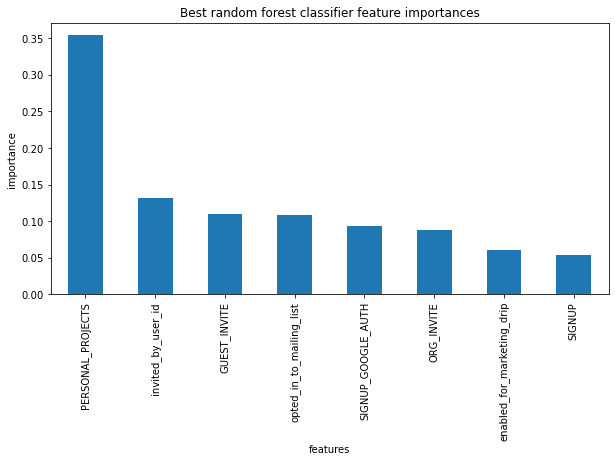

In [151]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestclassifier.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest classifier feature importances');

From our graph of fearture importances, we can see that personal projects has the most feature importances out of all the variables.